In [1]:
import numpy as np
import pandas as pd
import math as m
import cmath
import sympy as sym
import scipy as sci
import matplotlib.ticker as ticker
import random as rand
import matplotlib.pyplot as plt
import cmath as cm
from sympy import pprint
from scipy.optimize import minimize 
# import MLE_functions as fn
import MLE_functions_numpy as fnn
from MLE_functions_numpy import *
from scipy.optimize import fsolve
import pandas as pd

import warnings     # for suppresing the complex error warnings
warnings.filterwarnings("ignore", message="Casting complex values to real discards the imaginary part")

# Plotting for three inputs states: 

For tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi


For tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi


For tru = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]                # 30 deg diff, very uneven alpha

In [2]:
def ppm_errors_data(tru, nju_list, ig = 'inv'):  # uses pre-defined function 'ppm errors' on the list of collapse data, creates list of corresponding ppm errors
    
    ppm_errors_list = [fnn.ppm_errors(tru, nju, ig = ig) for nju in nju_list]
    ppm_sums_list = [[sum(i[j]) for j in range(2)] for i in ppm_errors_list]

    ppm_errors_inversion = [i[0] for i in ppm_sums_list]
    ppm_errors_optimization = [i[1] for i in ppm_sums_list]

    return [ppm_errors_inversion, ppm_errors_optimization]


def plot_ppm_errors(error_sum_lists, bins =25, xlim = (None, None), ylim = (None, None)):  # creates histogram and box plot of inversion and optimization ppm errors
    inv = error_sum_lists[0]    # list of ppm errors for inversion and optimization methods
    opt = error_sum_lists[1]    
    
    
    # histogram
    plt.hist([inv, opt], bins=bins, histtype='bar', stacked=False, label=['Inversion', 'Optimization'])
    plt.xlabel('Sum of PPM Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.legend()
    plt.xlim([ xlim[0],xlim[1]]) 
    plt.show()

    # box plot
    plt.boxplot([inv, opt], labels=['Inversion', 'Optimization'], 
                patch_artist=True, 
                boxprops=dict(facecolor='cyan', color='blue'), 
                medianprops=dict(color='red'), 
                whiskerprops=dict(color='green'), 
                capprops=dict(color='magenta'), 
                flierprops=dict(color='yellow', markeredgecolor='black'))
    plt.ylabel('Sum of PPM Errors')
    plt.ylim(ylim[0], ylim[1]) 
    plt.title('Box Plot of Sum of PPM Errors for Inversion and Optimization Methods')
    plt.show()

    # statistical properties
    average_inversion = np.mean(inv)
    average_optimization = np.mean(opt)
    std_dev_inversion = np.std(inv)
    std_dev_optimization = np.std(opt)
    avg_difference = np.sum(np.array(inv) - np.array(opt)) / len(inv)
    std_dev_difference = np.std(np.array(inv) - np.array(opt))
    # print statistical properties
    print(f"Average of PPM Inversion Errors: {average_inversion}")
    print(f"Average of PPM Optimization Errors: {average_optimization}")
    print(f"Standard Deviation of PPM Errors : Inversion Method: {std_dev_inversion}")
    print(f"Standard Deviation of PPM Errors : Optimization Method: {std_dev_optimization}")
    print(f"Average Difference between Optimization and Inversion PPM Errors: {avg_difference}")
    

# Plotting for a few states

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

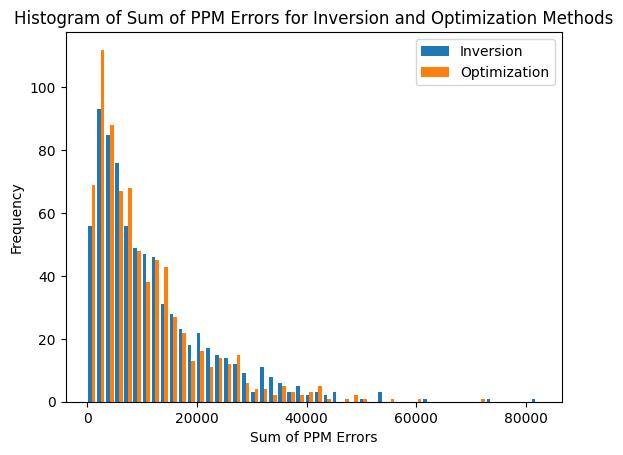

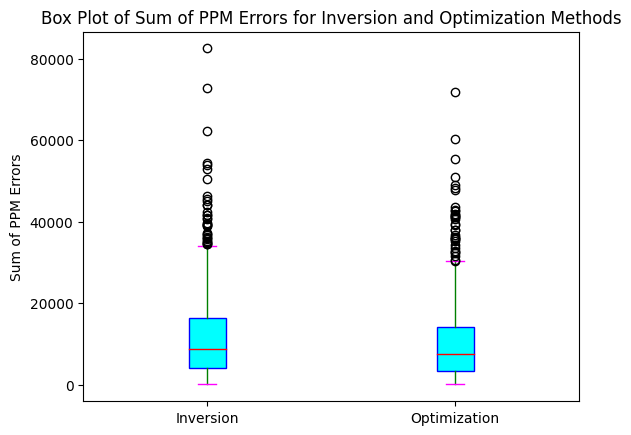

Average of PPM Inversion Errors: 11851.600640280622
Average of PPM Optimization Errors: 10545.892068089253
Standard Deviation of PPM Errors : Inversion Method: 10733.40316911412
Standard Deviation of PPM Errors : Optimization Method: 9820.276935448777
Average Difference between Optimization and Inversion PPM Errors: 1305.708572191368


[[67, 57, 124, 87, 224, 57, 125, 124, 135],
 [59, 48, 131, 100, 220, 51, 136, 104, 151],
 [63, 50, 118, 95, 228, 75, 111, 124, 136],
 [75, 51, 116, 83, 240, 63, 109, 116, 147],
 [64, 47, 120, 92, 236, 59, 132, 131, 119]]

In [10]:
# For state 1 : tru = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]     # 90 deg, non zero phi

tru1 = [m.pi/6, m.pi/2+m.pi/6, m.pi/4, m.pi/2, m.pi/6]
df_nju_1 = pd.read_csv('collapses_(30 120 45 90 30) 1k 1k.csv')
nju_1000_1 = df_nju_1.head(1000).values.tolist()
#Expected time to run ~ few minutes
errors_tru_1 = ppm_errors_data(tru1, nju_1000_1[250:])
plot_ppm_errors(errors_tru_1 ,bins = 50)

nju_1000_1[:5]

In [11]:
# For state 2 : tru = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]   # 60 deg diff, non zero phi
tru2 = [m.pi/12, m.pi/2-m.pi/12, m.pi/4, m.pi/2, m.pi/3]
df_nju = pd.read_csv('collapses_(15 75 45 90 60) 1k 1k.csv')
nju_1000_2 = df_nju.head(1000).values.tolist()


# error_sums_2 = ppm_errors_data(tru2, nju_1000_2[250:])
errors_tru_2 = ppm_errors_data(tru2, nju_1000_2[250:])
plot_ppm_errors(errors_tru_2, bins = 150, xlim = (0,80000), ylim = (0,80000))


FileNotFoundError: [Errno 2] No such file or directory: 'collapses_(15 75 45 90 60) 1k 1k.csv'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

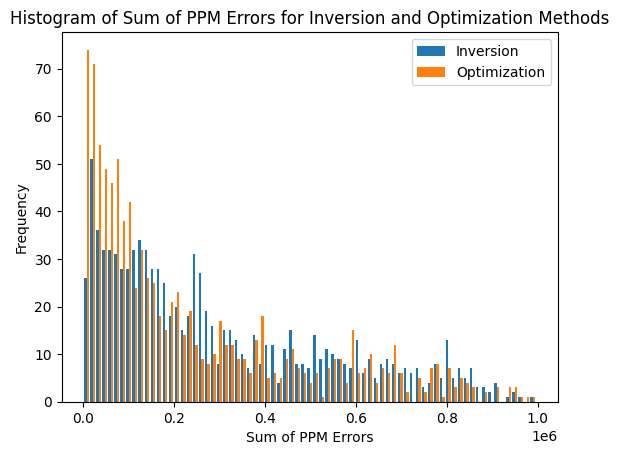

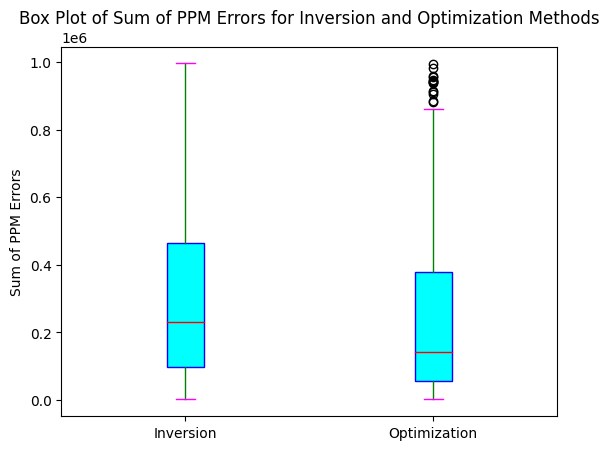

Average of PPM Inversion Errors: 298951.75425098627
Average of PPM Optimization Errors: 240564.52712321322
Standard Deviation of PPM Errors : Inversion Method: 245545.75615637164
Standard Deviation of PPM Errors : Optimization Method: 239985.82555281918
Average Difference between Optimization and Inversion PPM Errors: 58387.22712777303


In [7]:
#for martin analysis
# same for state 3 : [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]   # 30 deg diff, very small alpha
tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]
df_nju_3 = pd.read_csv('collapses_(30 60 0 45 15) 1k 1k.csv')
nju_1000_3 = df_nju_3.head(1000).values.tolist()

error_sums_3 = ppm_errors_data(tru3, nju_1000_3[250:])
plot_ppm_errors(error_sums_3, bins = 50, xlim = (0,100000), ylim = (0,100000))

In [23]:
# same for state 4 : [m.pi/2, m.pi/2+ m.pi/12, 0, m.pi/2, m.pi/12]  # 15 deg diff, very small alpha
tru4 = [m.pi/2, m.pi/2+ m.pi/12, 0, m.pi/2, m.pi/12]
# df_nju_4 = pd.read_csv('collapses_(90 105 0 90 15) 1k 1k.csv')
# nju_1000_4 = df_nju_4.head(1000).values.tolist()

# generating collapses
collapses_4 = fnn.generate_collapses(tru4, 1000, 100)
collapses_4_50k = fnn.generate_collapses(tru4, 50000, 100)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

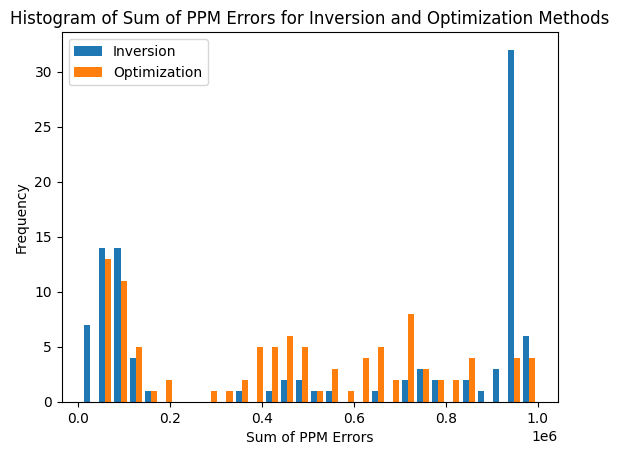

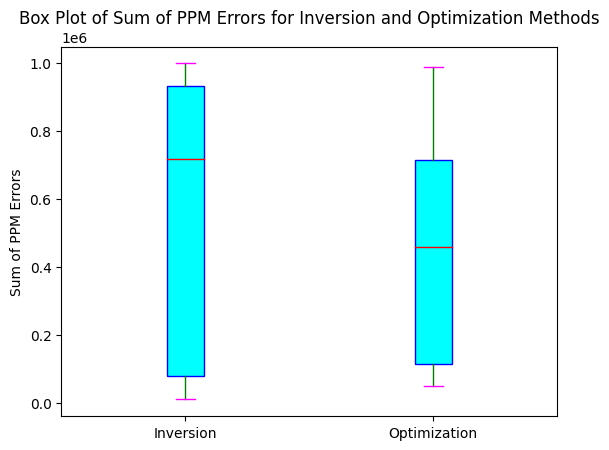

Average of PPM Inversion Errors: 537842.1646554748
Average of PPM Optimization Errors: 457722.77777764184
Standard Deviation of PPM Errors : Inversion Method: 401002.4789744329
Standard Deviation of PPM Errors : Optimization Method: 296904.6160561595
Average Difference between Optimization and Inversion PPM Errors: 80119.38687783296


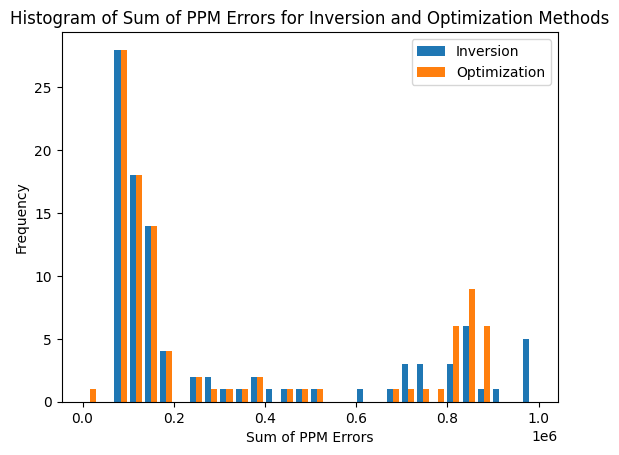

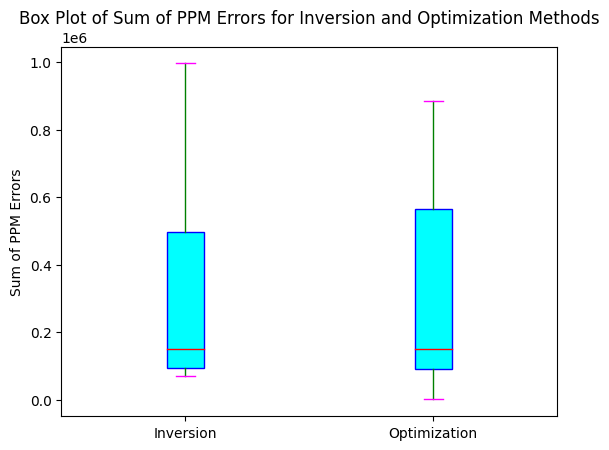

Average of PPM Inversion Errors: 314465.075696246
Average of PPM Optimization Errors: 314766.30951321166
Standard Deviation of PPM Errors : Inversion Method: 307773.78174644924
Standard Deviation of PPM Errors : Optimization Method: 308518.2286378024
Average Difference between Optimization and Inversion PPM Errors: -301.23381696567577


In [11]:
error_sums_4 = ppm_errors_data(tru4, collapses_4)
error_sums_4_50k = ppm_errors_data(tru4, collapses_4_50k)

plot_ppm_errors(error_sums_4, bins = 30)
plot_ppm_errors(error_sums_4_50k, bins = 30)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frame

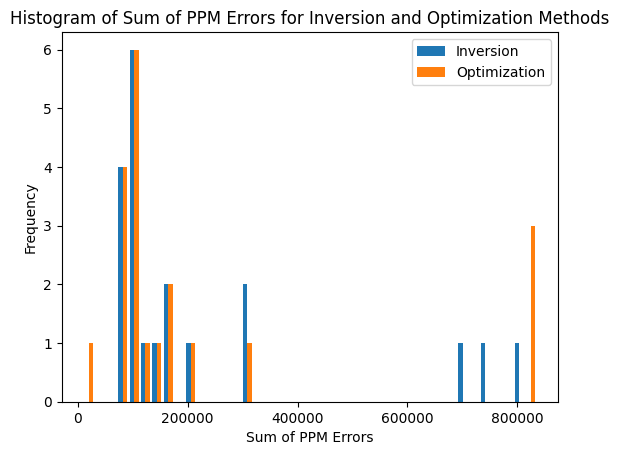

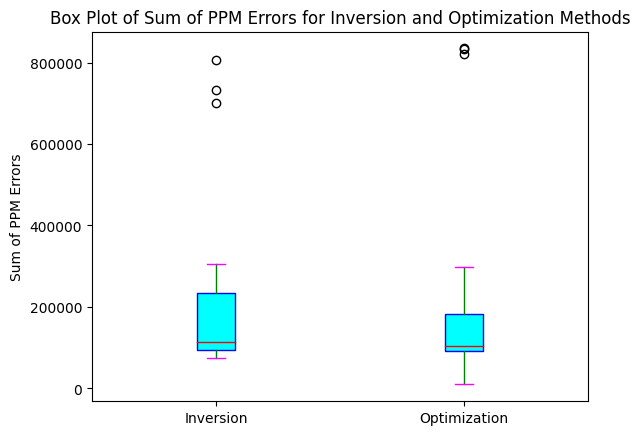

Average of PPM Inversion Errors: 228065.07699424447
Average of PPM Optimization Errors: 225808.6057896992
Standard Deviation of PPM Errors : Inversion Method: 227937.18983492898
Standard Deviation of PPM Errors : Optimization Method: 260411.84712668048
Average Difference between Optimization and Inversion PPM Errors: 2256.471204545276


In [26]:
#the 500k version for state 4
error_sums_4_100k = ppm_errors_data(tru4, collapses_4_100k[0:20])
plot_ppm_errors(error_sums_4_100k, bins = 40)

In [ ]:
# further analyzing the bad cases


In [4]:
# same for state 5 : [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]   # 30 deg diff, very small alpha
tru3 = [m.pi/6, m.pi/3, 0, m.pi/4, m.pi/12]
df_nju_3 = pd.read_csv('collapses_(30 60 0 45 15) 1k 1k.csv')
nju_1000_3 = df_nju_3.head(1000).values.tolist()
# plot_ppm_errors(tru3, nju_1000_3, bins = 75)

error_sums_3 = ppm_errors_data(tru3, nju_1000_3[250:])
plot_ppm_errors(error_sums_3, bins = 50, xlim = (0,100000), ylim = (0,100000))

[[1733.3991918708768, 806007.491905073],
 [981.2968499270935, 806254.0915367063]]

In [13]:
# Update for state: [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]
tru6 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]     # (105,120,0,90,15)

# Generating collapses
collapses_6 = fnn.generate_collapses(tru6, 500, 500)
collapses_6_20k = fnn.generate_collapses(tru6, 20000, 100)


# Calculate the ppm errors
# error_sums_4 = ppm_errors_data(tru4, collapses_4)
# error_sums_4_50k = ppm_errors_data(tru4, collapses_4_50k)

# plot_ppm_errors(error_sums_4, bins = 30)
# plot_ppm_errors(error_sums_4_50k, bins = 30)

# for tru6
error_sums_6 = ppm_errors_data(tru6, collapses_6)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

In [14]:
error_sums_6_20k = ppm_errors_data(tru6, collapses_6_20k)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x0).astype(float)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_differentiable_functions.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  self.x = np.atleast_1d(x).astype(float)
/Library/Framew

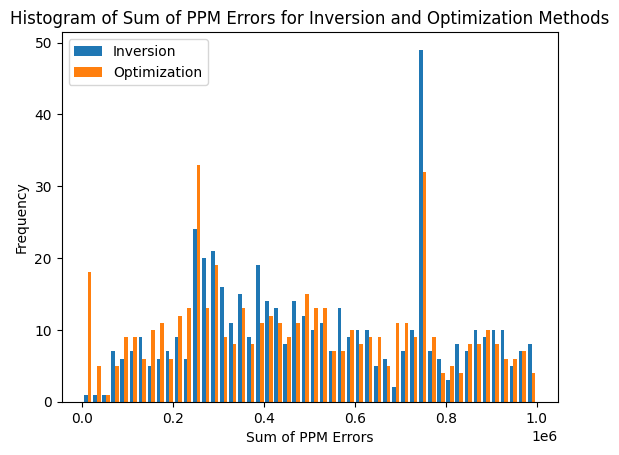

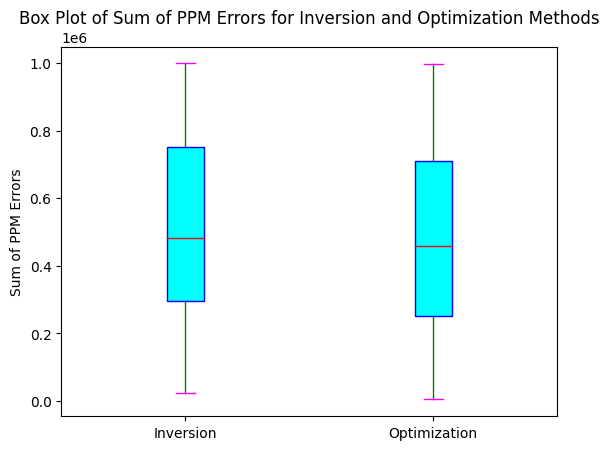

Average of PPM Inversion Errors: 513430.5052730521
Average of PPM Optimization Errors: 474151.25872657914
Standard Deviation of PPM Errors : Inversion Method: 252335.64737480495
Standard Deviation of PPM Errors : Optimization Method: 265443.6534971215
Average Difference between Optimization and Inversion PPM Errors: 39279.24654647296


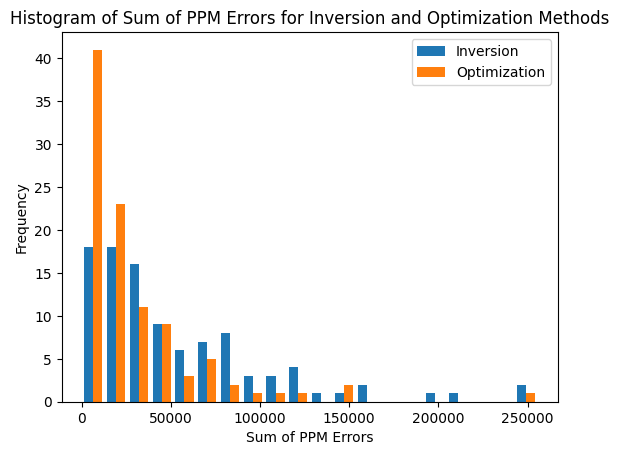

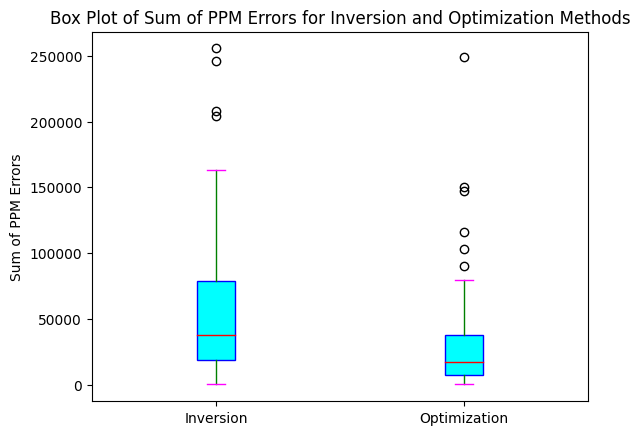

Average of PPM Inversion Errors: 54910.28776708903
Average of PPM Optimization Errors: 29763.43686233187
Standard Deviation of PPM Errors : Inversion Method: 52312.97809032504
Standard Deviation of PPM Errors : Optimization Method: 37008.539293539034
Average Difference between Optimization and Inversion PPM Errors: 25146.85090475716


In [15]:
# using my function, see equivalent using Martin's results in the next cell
plot_ppm_errors(error_sums_6, bins = 50)
plot_ppm_errors(error_sums_6_20k, bins = 20)

In [6]:
# doing again using Martin's results
import pandas as pd
import math as m
import MLE_functions_numpy as fnn

# plot_ppm_errors(error_sums_6, bins = 50)
# plot_ppm_errors(error_sums_6_20k, bins = 20)
tru6 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]     # (105,120,0,90,15)

# Cleaning up the data

# read data from .dat 
df_500 = pd.read_csv('mpDPFT_TabFunc_collapses_(105 120 0 90 15) 500 500_ParetoFront_20240708_093814.dat', delimiter='\s+', header=None)  # assuming space as delimiter and no header
df_20k = pd.read_csv('mpDPFT_TabFunc_collapses_(105 120 0 90 15) 20k 100_ParetoFront_20240708_093440.dat', delimiter='\s+', header=None)  # assuming space as delimiter and no header

# Display the DataFrame
# print(df_20k.head(10))

#remove the first two columns
df_500 = df_500.drop([0,1], axis=1)
df_20k = df_20k.drop([0,1], axis=1)

#for parameter values, remove after the 5th column
df_500_params = df_500.drop(df_500.columns[5:], axis=1)
df_20k_params = df_20k.drop(df_20k.columns[5:], axis=1)

# cleaned data for parameter values
df_20k_params.head()

#create lists of each row
sol_list_500 = df_500_params.values.tolist()
sol_list_20k = df_20k_params.values.tolist()

#create fidelity list for element of the sol list
#loop over the lists
fidelities_500 = []
fidelities_20k = []

for i in range(len(sol_list_500)):
    fidelities_500.append(fnn.fid(tru6, sol_list_500[i]))

for i in range(len(sol_list_20k)):
    fidelities_20k.append(fnn.fid(tru6, sol_list_20k[i]))

# finding ppm errors for each fidelity list
ppm_errors_martinopt_500 = [(2 - sum(i))*1e6 for i in fidelities_500]
ppm_errors_martinopt_20k = [(2 - sum(i))*1e6 for i in fidelities_20k]     # the ppm errors data for Optimization method using Martin's CMA-ES 


In [8]:
#finding ppm errors for the corresponding inversion method
"""def ppm_errors_data(tru, nju_list):  # uses pre-defined function 'ppm errors' on the list of collapse data, creates list of corresponding ppm errors
    
    ppm_errors_list = [fnn.ppm_errors(tru, nju) for nju in nju_list]
    ppm_sums_list = [[sum(i[j]) for j in range(2)] for i in ppm_errors_list]

    ppm_errors_inversion = [i[0] for i in ppm_sums_list]
    ppm_errors_optimization = [i[1] for i in ppm_sums_list]

    return [ppm_errors_inversion, ppm_errors_optimization]"""


#getting the nju data from the dataframes.
#first drop the first 5 columns, then keep the next 9 columns, then drop remaining columns
df_500.head()
df_500_nju = df_500.drop(df_500.columns[:5], axis=1)
df_500_nju = df_500_nju.drop(df_500_nju.columns[9:], axis=1)

df_20k_nju = df_20k.drop(df_20k.columns[:5], axis=1)
df_20k_nju = df_20k_nju.drop(df_20k_nju.columns[9:], axis=1)

df_500_nju.head()

#convert to list
nju_500 = df_500_nju.values.tolist()
nju_20k = df_20k_nju.values.tolist()

# read the nju data from the csv files, convert to list, then find the ppm errors
df_nju_500 = pd.read_csv('collapses_(105 120 0 90 15) 500 500.csv')
nju_500 = df_nju_500.head(500).values.tolist()
ppm_errors_inv_500 = ppm_errors_data(tru6, nju_500)[0]

df_nju_20k = pd.read_csv('collapses_(105 120 0 90 15) 20k 100.csv')
nju_20k = df_nju_20k.head(20).values.tolist()
ppm_errors_inv_20k = ppm_errors_data(tru6, nju_20k)[0]


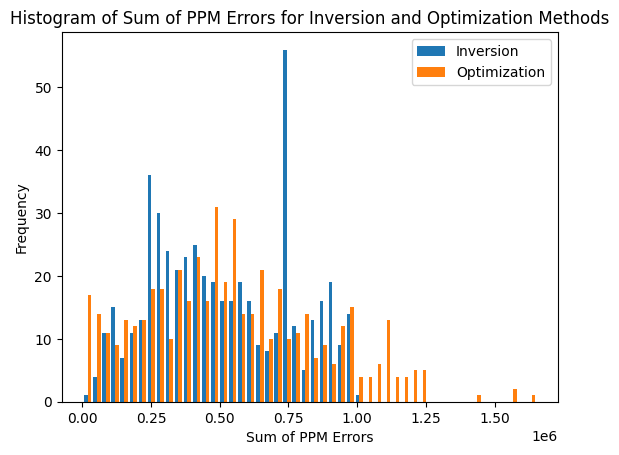

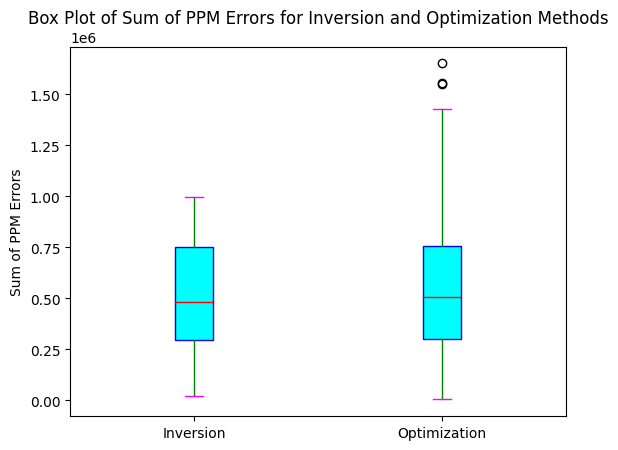

Average of PPM Inversion Errors: 513430.5052730521
Average of PPM Optimization Errors: 545486.533387946
Standard Deviation of PPM Errors : Inversion Method: 252335.64737480495
Standard Deviation of PPM Errors : Optimization Method: 321153.5294489936
Average Difference between Optimization and Inversion PPM Errors: -32056.028114893943


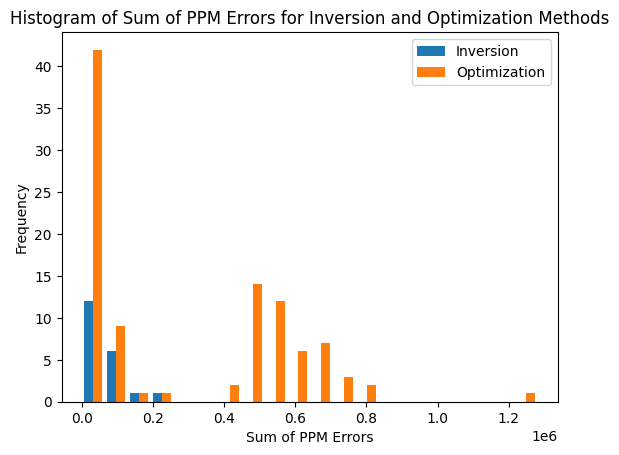

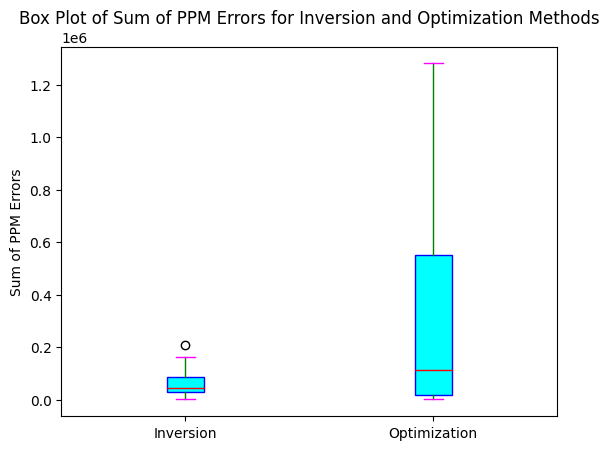

ValueError: operands could not be broadcast together with shapes (20,) (100,) 

In [9]:
# plotting
# big error sum lists containing inversion and optimization ppm errors
error_sum_lists_500 = [ppm_errors_inv_500, ppm_errors_martinopt_500]
error_sum_lists_20k = [ppm_errors_inv_20k, ppm_errors_martinopt_20k]

plot_ppm_errors(error_sum_lists_500, bins = 50)
plot_ppm_errors(error_sum_lists_20k, bins = 20)



#Retrying the previously produced graphs, trying to reproduce it, and matching the valuse of inversion fidelities

In [6]:

tru6 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]     # (105,120,0,90,15)

# Generating collapses
# collapses_6 = fnn.generate_collapses(tru6, 500, 500)
# collapses_6_20k = fnn.generate_collapses(tru6, 20000, 100)

# read the nju data from csv files
df_nju_6 = pd.read_csv('collapses_(105 120 0 90 15) 500 500.csv')
nju_6 = df_nju_6.head(500).values.tolist()
df_nju_6_20k = pd.read_csv('collapses_(105 120 0 90 15) 20k 100.csv')
nju_6_20k = df_nju_6_20k.head(100).values.tolist()


# Calculate the ppm errors
error_sums_6 = ppm_errors_data(tru6, nju_6)
error_sums_6_20k = ppm_errors_data(tru6, nju_6_20k)

#plotting
plot_ppm_errors(error_sums_6, bins = 50)
plot_ppm_errors(error_sums_6_20k, bins = 20)

KeyboardInterrupt: 

In [11]:
#checking if the ppm errors match for the previous case and martin's case

print(error_sums_6[0][:10])
print(error_sums_6_20k[0][:10])

print(ppm_errors_inv_500[:10])
print(ppm_errors_inv_20k[:10])

[755741.113072141, 619595.7260730418, 303058.2385148103, 845971.8031520548, 269622.4986566034, 504682.99668576696, 232632.43853422656, 301871.70335004735, 751465.7607988499, 563626.0428289279]
[30904.228563121473, 123576.57197606032, 11847.021293049043, 49004.841874992315, 23546.327624585196, 89426.9324261805, 34084.191348860426, 4382.456097264509, 84602.28886635345, 14133.000207312785]
[755741.113072141, 619595.7260730418, 303058.2385148103, 845971.8031520548, 269622.4986566034, 504682.99668576696, 232632.43853422656, 301871.70335004735, 751465.7607988499, 563626.0428289279]
[30904.228563121473, 123576.57197606032, 11847.021293049043, 49004.841874992315, 23546.327624585196, 89426.9324261805, 34084.191348860426, 4382.456097264509, 84602.28886635345, 14133.000207312785]


In [22]:
#comparing the function values at the minimums due to martins algo and CG algo.

for nju in nju_6[:10]:
    inv = fnn.Inversion_new(params = tru6, N =int(sum(nju)), threshold = 'variable', nju = nju)
    inv_params = inv[2]
    sol = fnn.minimize(fnn.L, inv_params , args=(nju))
    sol_params = sol.x
    fun = sol.fun
    # print(fnn.L(tru6, nju))
    print(fun)


1.9189934779332054
1.924793720118632
1.955136239196717
1.9381807396765156
1.934257715788264
1.6591692685051773
1.9669751968274398
1.9543231744945289
1.9613526989759504
1.9910523041493164


In [46]:
"""
m_r =  [ 1.9165177666559, 1.9247937175544,  1.9551362391923, 1.9381807396604,  1.9342577157665,  1.9768349833817, 1.9669751968253, 1.9543231744003, 1.9613526989736, 1.9910523040996]

p_r = [1.9189934779332054 , 1.924793720118632 , 1.955136239196717 , 1.9381807396765156 , 1.934257715788264 , 1.6591692685051773 , 1.9669751968274398 , 1.9543231744945289 , 1.9613526989759504 , 1.9910523041493164]

for i in range(10):
    print(p_r[i] - m_r[i])
"""
#  number 6 is the only weird one

nju6 = nju_6[5]
inv = fnn.Inversion_new(params = tru6, N =int(sum(nju6)), threshold = 'variable', nju = nju6)

ig = inv[2]
ig = np.random.rand(5)
sol6 = fnn.minimize(fnn.L, ig , args=(nju6))

(ig, sol6.x, sol6.fun)
print("ig:", ig)
print("nju6:", nju6)
print("sol6.x:", sol6.x)
print("sol6.fun:", sol6.fun)

print(fnn.L(n =nju6))
print(fnn.L(vars = sol6.x, n = nju6))

#cross entropy
min = sum([i*m.log(i) for i in [j/sum(nju6) for j in nju6]])
print(min)

# sol.x to degrees
sol6_deg = [i*180/m.pi for i in sol6.x]
print(sol6_deg)

print('martins angles for the w2eird case in degrees', [i*180/m.pi for i in [1.9426497829554, 4.9695582089987 ,3.5851639952281, 6.6014963863738, 5.069552012023]])

ig: [0.0221245  0.15315141 0.37008475 0.71108226 0.9832616 ]
nju6: [117, 14, 69, 53, 10, 73, 71, 13, 80]
sol6.x: [-0.09191448  1.77185001  1.62443253  0.25863835  1.30461573]
sol6.fun: 1.9768419363433989
1.9756358843301092
1.9768419363433989
-1.9756358843301092
[-5.2663118539064575, 101.51952750256982, 93.07312834497719, 14.818885853073345, 74.74897542422501]
martins angles for the w2eird case in degrees [111.30563363534982, 284.7347114202178, 205.41476578883052, 378.237881410083, 290.46393431097266]


#GPT Code/

In [93]:
# Load the CSV and DAT files
my_results = pd.read_csv('collapses_(105 120 0 90 15) 500 500.csv')
colleague_results = pd.read_csv('mpDPFT_TabFunc_collapses_(105 120 0 90 15) 500 500_ParetoFront_20240708_093814.dat', sep='\s+', header=None)
colleague_results = colleague_results.iloc[:, 2:7].values  # Extract relevant columns

# make lists
my_results = my_results.values.tolist()[:50]
colleague_results = colleague_results.tolist()[:50]

# find optimized angles for my results
my_optimized_angles = [(fnn.minimize(fnn.L, Inversion_new(N = sum(nju), nju= nju, params = tru6)[2], args=(nju))).x for nju in my_results]

# convert to degrees and print
my_optimized_angles_deg = [[i*180/m.pi for i in j] for j in my_optimized_angles]
colleague_results_deg = [[i*180/m.pi for i in j] for j in colleague_results]

#compare the optimized angles for my results and colleague's results
for i in range(50):
    # remove after two decimal points
    my_optimized_angles_deg[i] = [round(j, 2) for j in my_optimized_angles_deg[i]]
    colleague_results_deg[i] = [round(j, 2) for j in colleague_results_deg[i]]
    print(my_optimized_angles_deg[i])
    print(colleague_results_deg[i])
    
    print('\n \n ')

#  [105, 120, 0, 90, 15]  # 105, 120, 0, 90, 15

# create quantum states from these angles for both me and colleague
my_states = [fnn.Creating_states(i)[0] for i in my_optimized_angles]
colleague_states = [fnn.Creating_states(i)[0] for i in colleague_results]


[(75.57+0j), (16.69+0j), (-172.73+0j), (11.12+0j), -4.27j]
[101.13, 122.62, 378.73, 336.4, 157.98]

 
 
[(77.07+0j), (26.71+0j), (-171.49+0j), (-25.43+0j), (9.76-0j)]
[282.93, 153.27, 8.51, 154.65, 170.24]

 
 
[(80.52+0j), (122.68+0j), (154.76+0j), (49.87+0j), (25.51-0j)]
[237.32, 80.52, 229.87, 154.76, 64.49]

 
 
[(75.02+0j), (20.92+0j), (-174.43+0j), (58.26+0j), (9.26-0j)]
[255.02, 339.08, 185.57, 238.26, 189.26]

 
 
[(70.09+0j), (96+0j), (182.99+0j), (50.64+0j), (43.79+0j)]
[109.91, 96.0, 3.0, 50.64, 316.21]

 
 
[(61.96+0j), (90+0j), (91.01+0j), 0j, (90+29.79j)]
[111.31, 284.73, 205.41, 378.24, 290.46]

 
 
[(74.88+0j), (51.72+0j), (-179.66+0j), (-54.53+0j), (14.12+0j)]
[74.88, 128.28, 180.34, 125.47, 194.12]

 
 
[(75.65+0j), (33.27+0j), (-178.51+0j), (-139.33+0j), (13.43-0j)]
[255.65, 213.27, 181.49, 220.69, 193.43]

 
 
[(76.7+0j), (-11.2+0j), (182.62+0j), (-43.12+0j), (14.03-0j)]
[348.8, 256.7, 316.88, 182.62, 75.97]

 
 
[(75.39+0j), (15.23+0j), (-176.37+0j), (-41.11+0j), (

/var/folders/z5/8__h5b611fz3d61c954t7_540000gp/T/ipykernel_21033/375155956.py:20: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  my_optimized_angles_deg[i] = [round(j, 2) for j in my_optimized_angles_deg[i]]


In [94]:

# print original state
tru_states6 = fnn.Creating_states(tru6)[0]
# clean up, remove after 2 decimal points, make into lists
tru_states6 = [np.round(i, 2) for i in tru_states6]
# convert to list
tru_states6 = [i.tolist() for i in tru_states6]
print(tru_states6)

# print and compare mine and martins, after cleaning like above
for i in range(50):
    m_s = [np.round(j, 2) for j in my_states[i]]
    m_s = [j.tolist() for j in m_s]
    print(m_s)
    c_s = [np.round(j, 2) for j in colleague_states[i]]
    c_s = [j.tolist() for j in c_s]
    print(c_s)
    print('\n \n')


my_states[0]
# [[(-0.26+0j), (0.97+0j)], [(-0.5+0j), 0.87j]]

[[(-0.26+0j), (0.97+0j)], [(-0.5+0j), 0.87j]]
[[(0.25-0j), (-0.96-0.12j)], [(0.96-0j), (0.28+0.06j)]]
[[(-0.19+0j), (0.93+0.31j)], [(-0.54+0j), (0.77-0.34j)]]

 

[[(0.22-0j), (-0.96-0.14j)], [(0.89-0j), (0.41-0.19j)]]
[[(0.22+0j), (-0.96-0.14j)], [(-0.89+0j), (-0.41+0.19j)]]

 

[[(0.16-0j), (-0.89+0.42j)], [(-0.54-0j), (0.54+0.64j)]]
[[(-0.54+0j), (0.54+0.64j)], [(0.16+0j), (-0.89+0.42j)]]

 

[[(0.26-0j), (-0.96-0.09j)], [(0.93-0j), (0.19+0.3j)]]
[[(-0.26+0j), (0.96+0.09j)], [(0.93+0j), (0.19+0.3j)]]

 

[[(0.34-0j), (-0.94-0.05j)], [(-0.1-0j), (0.63+0.77j)]]
[[(-0.34+0j), (0.94+0.05j)], [(-0.1+0j), (0.63+0.77j)]]

 

[[(0.47-0j), (-0.02+0.88j)], [-0j, (1+0j)]]
[[(-0.36+0j), (-0.84-0.4j)], [(0.25+0j), (-0.92-0.3j)]]

 

[[(0.26-0j), (-0.97-0.01j)], [(0.62-0j), (0.46-0.64j)]]
[[(0.26+0j), (-0.97-0.01j)], [(-0.62+0j), (-0.46+0.64j)]]

 

[[(0.25-0j), (-0.97-0.03j)], [(0.84-0j), (-0.42-0.36j)]]
[[(-0.25+0j), (0.97+0.03j)], [(-0.84+0j), (0.42+0.36j)]]

 

[[(0.23-0j), (-0.97-0.04j)], [(

[array([ 0.24914595-0.j        , -0.96067196-0.12262009j]),
 array([0.95785273-0.j        , 0.28186177+0.05542646j])]

checking my data again this time starting from random initial guesses hopefully it is better than before using inversion method because of lack of anomalies

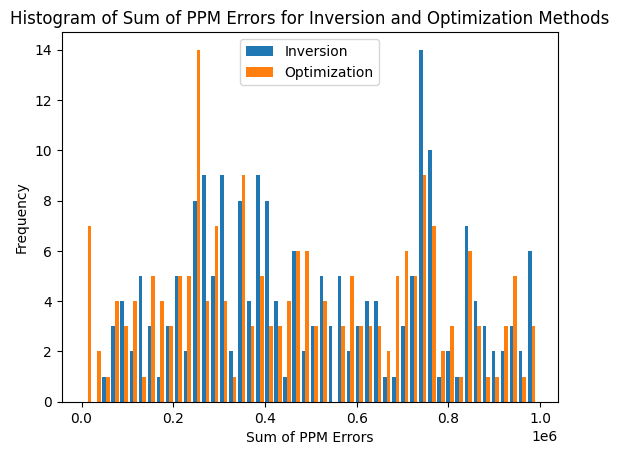

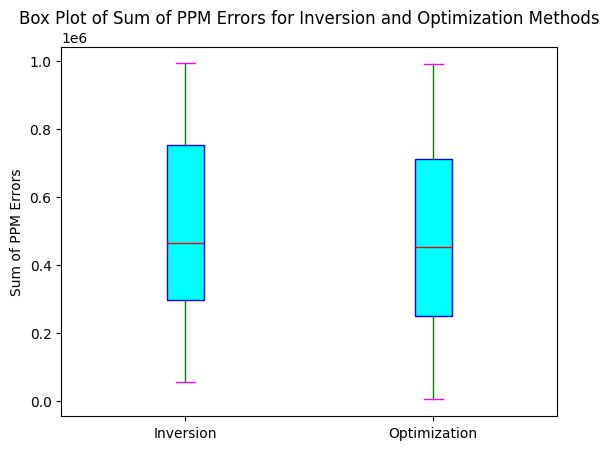

Average of PPM Inversion Errors: 509419.008284466
Average of PPM Optimization Errors: 471126.40724852635
Standard Deviation of PPM Errors : Inversion Method: 257552.1388745362
Standard Deviation of PPM Errors : Optimization Method: 269495.30695469
Average Difference between Optimization and Inversion PPM Errors: 38292.60103593962


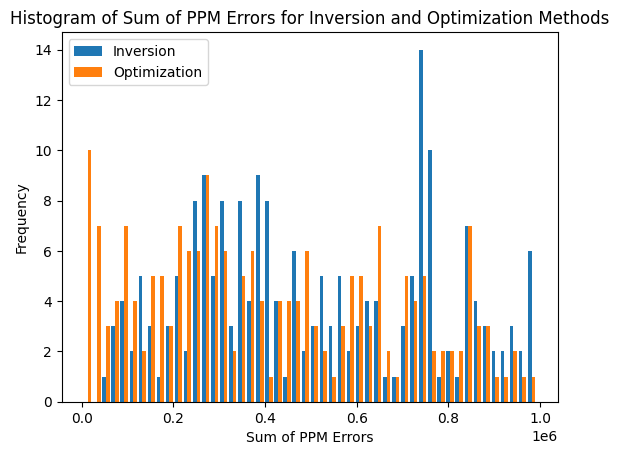

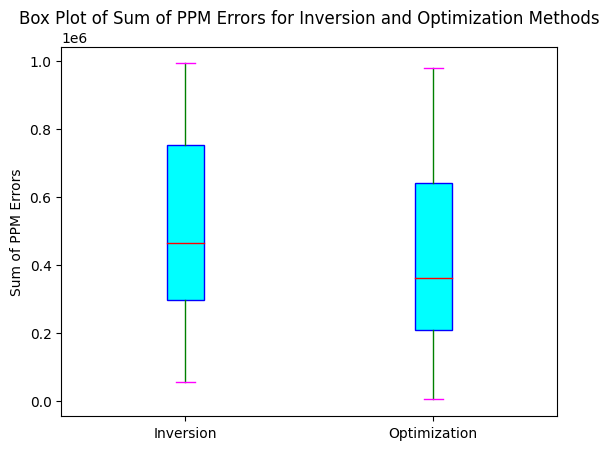

Average of PPM Inversion Errors: 509419.008284466
Average of PPM Optimization Errors: 411604.23066817893
Standard Deviation of PPM Errors : Inversion Method: 257552.1388745362
Standard Deviation of PPM Errors : Optimization Method: 269648.11875175685
Average Difference between Optimization and Inversion PPM Errors: 97814.77761628706


In [3]:
# Replotting my results for 105, 120, 0, 90, 15_500 file

# read the nju data from csv files
tru6 = [m.pi/2+m.pi/12, m.pi/2+ m.pi/6, 0, m.pi/2, m.pi/12]     # (105,120,0,90,15)
df_nju_6 = pd.read_csv('collapses_(105 120 0 90 15) 500 500.csv')
nju_6 = df_nju_6.head(500).values.tolist()[:200]

#plotting with inversion as initial guess
error_sums_6 = ppm_errors_data(tru6, nju_6)
plot_ppm_errors(error_sums_6, bins = 50)


#plotting with random initial guess
error_sums_6 = ppm_errors_data(tru6, nju_6, ig = 'rand')
plot_ppm_errors(error_sums_6, bins = 50)
